#**SEP 775 Assignment - 2**
                        
**Student: Rutvik Roy**\
**Student ID: 400490159**


# Q-1 RNN-Based Text Generationn

• Implement a basic Recurrent Neural Network model from scratch using PyTorch or
TensorFlow. Your model should include an embedding layer, at least one RNN layer
and a fully connected layer for output. Refer to the "Recurrent Neural Networks
(RNN)"section of the lectures for guidance on the architecture.

• Use the "Long Short-Term Memory RNNs (LSTMs)"section as a reference to enhance
your model with LSTM cells to improve its ability to capture long-term dependencies
in text.

In [ ]:
!pip install torch
!pip install nltk
!pip install matplotlib

In [ ]:
import torch
import torch.nn as nn
import requests
import re
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#text data from a file loaded on Google Drive

file_id='1I-Hw6RHgl2tMwLy6mJ40nSVk7P2wjfFi'
url= f"https://drive.google.com/uc?export=download&id={file_id}"
response=requests.get(url)
data=response.text

print(data)


###  data preprocessing steps ###

def string_to_tokens(text):
  return text.split()

def lowercase_the_tokens(tokens):
  return [token.lower() for token in tokens]

def remove_unncessary_symbol(tokens):
  return [re.sub(r'[^\w\s]'," ",token) for token in tokens]

def remove_stop_words(tokens):
  stop_words_in_nltk=set(nltk.corpus.stopwords.words("english"))
  return[token for token in tokens if token not in stop_words_in_nltk]

def preprocess_data(data):
  tokens=string_to_tokens(data)
  tokens=lowercase_the_tokens(tokens)
  tokens=remove_unncessary_symbol(tokens)
  #tokens=remove_stop_words(tokens)
  return tokens

tokens=preprocess_data(data)
print(tokens)

Twinkle, twinkle, little star,
How I wonder what you are!
Up above the world so high,
Like a diamond in the sky.

When the blazing sun is gone,
When he nothing shines upon,
Then you show your little light,
Twinkle, twinkle, all the night.

Then the traveler in the dark
Thanks you for your tiny spark,
How could he see where to go,
If you did not twinkle so?

In the dark blue sky you keep,
Often through my curtains peep
For you never shut your eye,
Till the sun is in the sky.

As your bright and tiny spark
Lights the traveler in the dark,
Though I know not what you are,
Twinkle, twinkle, little star.
['twinkle ', 'twinkle ', 'little', 'star ', 'how', 'i', 'wonder', 'what', 'you', 'are ', 'up', 'above', 'the', 'world', 'so', 'high ', 'like', 'a', 'diamond', 'in', 'the', 'sky ', 'when', 'the', 'blazing', 'sun', 'is', 'gone ', 'when', 'he', 'nothing', 'shines', 'upon ', 'then', 'you', 'show', 'your', 'little', 'light ', 'twinkle ', 'twinkle ', 'all', 'the', 'night ', 'then', 'the', 'travele

In [ ]:
#vocab building

vocab=list(set(tokens))
vocab.append(".")

vocab_size=len(vocab)
word_to_index={word:i for i,word in enumerate(vocab)}
index_to_word={i:word for i,word in enumerate(vocab)}

# **RNN (Simple RNN)**

In [ ]:
#RNN implimentation (Simple RNN)

class RNNSimple(nn.Module):

  def __init__(self,vocab_size,embedding_dim,hidden_dim,output_dim,num_layers):
    super().__init__()

    self.embedding=nn.Embedding(vocab_size,embedding_dim)
    self.rnn=nn.RNN(embedding_dim,hidden_dim, num_layers=num_layers)
    self.linear=nn.Linear(hidden_dim,output_dim)


  def forward(self,input):

    word_index=[word_to_index[w] for w in input]
    embedding=self.embedding(torch.tensor(word_index))
    out,h=self.rnn(embedding)
    out=self.linear(out)

    return out

In [ ]:
embedding_dim,hidden_dim,output_dim,num_layers = 100,150,vocab_size,5

simple_rnn_model=RNNSimple(vocab_size,embedding_dim,hidden_dim,output_dim,num_layers)

Text(0, 0.5, 'Training Loss')

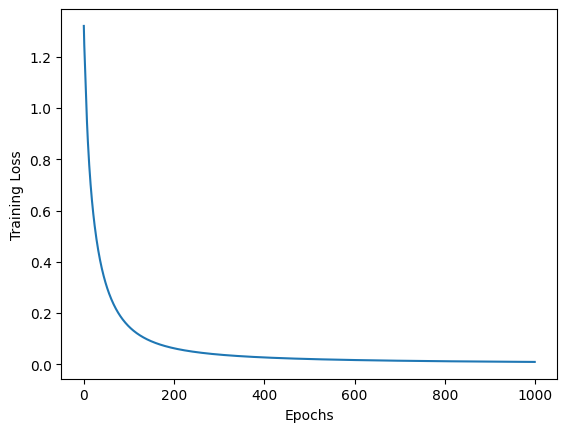

In [ ]:
# sequence size
sequence_size=3

#batch size
batch_size=int(len(tokens)/sequence_size)

#optimizer object
optimizer=torch.optim.Adagrad(simple_rnn_model.parameters(),lr=0.001)

#cross entropy object
loss=nn.CrossEntropyLoss()

simple_rnn_model.train()
num_epochs = 1000
LOSS=[]

for epoch in range(num_epochs):
  pointer=0
  running_loss=0
  for batch in range(batch_size):

    start=pointer
    end=pointer+sequence_size

    #model input tokens
    input=tokens[start:end]

    #model target tokens
    target=tokens[start+1:end+1]

    out=simple_rnn_model.forward(input)

    #one hot vector of target tokens for measurement of loss
    target=nn.functional.one_hot(torch.tensor([word_to_index[w] for w in target]),vocab_size).type("torch.FloatTensor")

    optimizer.zero_grad()

    batch_loss=loss(out,target)
    batch_loss.backward(retain_graph=True)

    optimizer.step()

    pointer=pointer+sequence_size
    running_loss += batch_loss.item()

    if pointer+sequence_size+1> batch_size:
      break

  LOSS.append(running_loss / batch_size)
  #print('Epoch [{}/{}], Average Loss: {:.4f}'.format(epoch+1, num_epochs, running_loss / batch_size))


#Plot loss
plt.plot([i for i in range(num_epochs)],LOSS)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")

In [ ]:
#save the model. I have alread saved model's weights and provided in zip file. So, I have comment out this cell line
#torch.save(simple_rnn_model.state_dict(), 'Simple_RNN_model_weights.pth')

In [ ]:
# Load the saved model (saved weights)
embedding_dim,hidden_dim,output_dim,num_layers = 100,150,vocab_size,5
loaded_model=RNNSimple(vocab_size,embedding_dim,hidden_dim,output_dim,num_layers)
loaded_model.load_state_dict(torch.load('Simple_RNN_model_weights.pth'))

# Set the model to evaluation mode
loaded_model.eval()

#first word to be ingested into trained model
word=tokens[0:1]

for i in range(100):

  # Make predictions
  with torch.no_grad():
      prediction = loaded_model(word)

      soft=nn.Softmax(dim=0)
      out=soft(prediction[-1])

      #take the highest probable one
      o=torch.argmax(out)
      predicted_word=index_to_word[o.item()]
      word.append(predicted_word)

#Print predicted 100 words
print(' '.join(word))

twinkle  twinkle  little star  star  i i wonder what you are  up above the blazing sun is gone  when he nothing shines upon  then you show your shines the world so high  like a diamond in the sky  when the blazing sun is gone  when he nothing shines upon  then you show your shines the world so high  like a diamond in the sky  when the blazing sun is gone  when he nothing shines upon  then you show your shines the world so high  like a diamond in the sky  when the blazing sun is gone  when he nothing shines upon 


# **LSTM (Enhanced RNN)**

In [ ]:
#RNN implimentation (LSTM)

class LSTM(nn.Module):

  def __init__(self,vocab_size,embedding_dim,hidden_dim,output_dim,num_layers):
    super().__init__()

    self.embedding=nn.Embedding(vocab_size,embedding_dim)
    self.rnn=nn.LSTM(embedding_dim,hidden_dim, num_layers=num_layers)
    self.linear=nn.Linear(hidden_dim,output_dim)
    self.drop=nn.Dropout(0.3)


  def forward(self,input):

    word_index=[word_to_index[w] for w in input]
    embedding=self.embedding(torch.tensor(word_index))
    out,(h,c)=self.rnn(embedding)
    out=self.linear(out)

    return out

In [ ]:
embedding_dim,hidden_dim,output_dim,num_layers = 100,150,vocab_size,5
LSTM_model=LSTM(vocab_size,embedding_dim,hidden_dim,output_dim,num_layers)

In [ ]:
sequence_size=3
batch_size=int(len(tokens)/sequence_size)

optimizer=torch.optim.Adagrad(LSTM_model.parameters(),lr=0.001)
loss=nn.CrossEntropyLoss()

LSTM_model.train()
num_epochs = 1000
LOSS1=[]
for epoch in range(num_epochs):

  pointer=0
  running_loss1=0

  for batch in range(batch_size):

    start=pointer
    end=pointer+sequence_size

    input=tokens[start:end]
    target=tokens[start+1:end+1]

    out=LSTM_model.forward(input)
    target=nn.functional.one_hot(torch.tensor([word_to_index[w] for w in target]),vocab_size).type("torch.FloatTensor")

    optimizer.zero_grad()

    batch_loss1=loss(out,target)
    batch_loss1.backward(retain_graph=True)

    optimizer.step()

    pointer=pointer+sequence_size
    running_loss1 += batch_loss.item()

    if pointer+sequence_size+1> batch_size:
      break

  LOSS1.append(running_loss1 / batch_size)
  #print('Epoch [{}/{}], Average Loss: {:.4f}'.format(epoch+1, num_epochs, running_loss / batch_size))

Text(0.5, 1.0, 'LSTM Model')

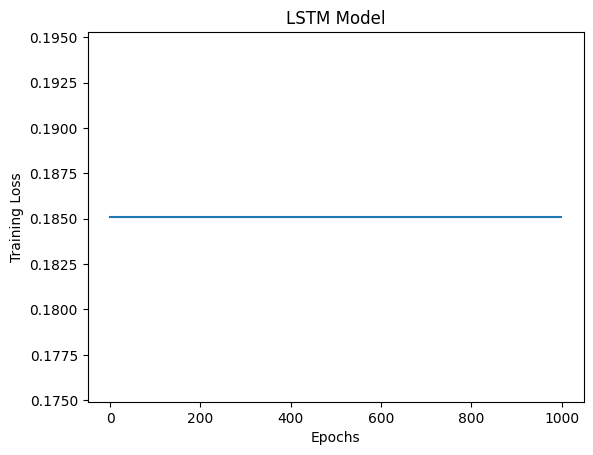

In [ ]:
#Plot loss
plt.plot([i for i in range(num_epochs)],LOSS1)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("LSTM Model")

In [ ]:
#save the model
#torch.save(LSTM_model.state_dict(), 'LSTM_model_weights.pth')

In [ ]:
# Load the saved model
embedding_dim,hidden_dim,output_dim,num_layers = 100,150,vocab_size,5
loaded_LSTM_model=LSTM(vocab_size,embedding_dim,hidden_dim,output_dim,num_layers)
loaded_LSTM_model.load_state_dict(torch.load('LSTM_model_weights.pth'))

# Set the model to evaluation mode
loaded_LSTM_model.eval()

#first word to be ingested into trained model
word=tokens[0:1]

for i in range(100):

  # Make predictions
  with torch.no_grad():
      prediction = loaded_LSTM_model(word)

      soft=nn.Softmax(dim=0)
      out=soft(prediction[-1])

      #take the highest probable one
      o=torch.argmax(out)
      predicted_word=index_to_word[o.item()]
      word.append(predicted_word)

#Print predicted 100 words
print(' '.join(word))

twinkle  twinkle  little star  star  star  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  sky  the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the
